En el archivo ```geriatra.txt``` se presentan los datos de un estudio con individuos de por lo menos 65 años de edad en buenas condiciones físicas. Las variables del estudio son:

Caídas (número de caídas en el período).
Intervención (0 = educación solamente, 1 = educación y ejercicios físicos).
Sexo (0 = femenino, 1 = masculino).
Balance (puntuación).
Fuerza (puntuación).
Construir un intervalo de confianza para el promedio poblacional del balance al 95% de confianza.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [33]:
DATA = pd.read_csv('geriatra.txt', sep='\s+', header=None)
DATA.columns = ["caidas", "intervencion", "sexo", "balance", "fuerza"]

y = DATA.balance
print(y.describe())

count    100.000000
mean      52.830000
std       19.255882
min       13.000000
25%       39.000000
50%       51.500000
75%       66.250000
max       98.000000
Name: balance, dtype: float64


Text(0, 0.5, 'Densidad')

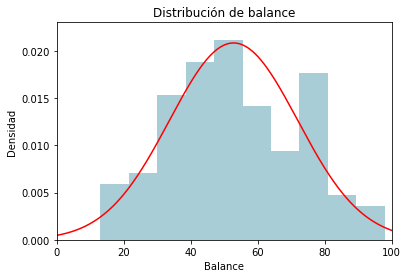

In [46]:
fig, ax = plt.subplots()

x = np.linspace(0, 100, 10000)
ax.hist(y, color='#539caf', density=True, alpha=0.5)
ax.plot(x, stats.norm.pdf(x, np.mean(y), np.std(y)), color='r')
ax.set_xlim(0, 100)
ax.set_ylim(0, 0.023)
ax.set_title('Distribución de balance')
ax.set_xlabel('Balance')
ax.set_ylabel('Densidad')

In [65]:
n = len(y)
xb = y.mean()
sd = y.std()

t = stats.t(n - 1)
t975 = t.ppf(0.975)

norm = stats.norm()
z975 = norm.ppf(0.975)

met = t975 * sd / np.sqrt(n)

mez = z975 * sd / np.sqrt(n)

ic_t = xb + np.array([-met, met])
ic_z = xb + np.array([-mez, mez])

print('Tesing:')
print('t975:', t975)
print('z975:', z975)
print('met:', met)
print('mez:', mez)
print('ic_t:', ic_t)
print('ic_z:', ic_z)

Tesing:
t975: 1.9842169515086827
z975: 1.959963984540054
met: 3.820784739311783
mez: 3.7740835124089935
ic_t: [49.00921526 56.65078474]
ic_z: [49.05591649 56.60408351]


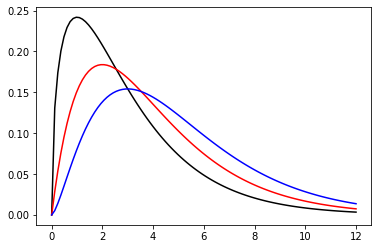

In [62]:
x = np.linspace(0, 12, 100)
chi1 = stats.chi2(3)
chi2 = stats.chi2(4)
chi3 = stats.chi2(5)
plt.plot(x, chi1.pdf(x), color='k')
plt.plot(x, chi2.pdf(x), color='r')
plt.plot(x, chi3.pdf(x), color='b')